# Introduction
## Aim
This notebook is a tutorial for new computational neuroscientists on how to examine structural and functional connectivity matrices for modelling.


In [18]:
# Load libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import nilearn.plotting as plotting
import matplotlib.pyplot as plt
import networkx as nx


### Load matrices

In [19]:
# Load dataset

sub = '0001'
session = '1'
bold_dir = f'data/sub-{sub}/bold'
fc_dir = f'data/sub-{sub}/fc'
sc_dir = f'data/sub-{sub}/sc'

fc_matrix = pd.read_csv(f'{fc_dir}/{sub}_{session}_RestEmpCorrFC.csv', header=None)
weight_matrix = pd.read_csv(f'{sc_dir}/{sub}_{session}_Counts.csv', header=None)
length_matrix = pd.read_csv(f'{sc_dir}/{sub}_{session}_Lengths.csv', header=None)


### Summary statistics

##### **1. Functional Connectivity Matrix**
   - **Correlation Values**: Look for both strong positive (near 1) and negative (below 0) correlations. These indicate strong relationships and anti-correlations between regions, respectively.
   - **Diagonal Dominance**: Expect a strong diagonal where each region is perfectly correlated with itself.
   - **Sparsity**: Typically, functional connectivity matrices are dense with very few zeros, indicating that most regions have some level of functional connection.
   - **Pattern Identification**: Identify clusters of high correlation, which may indicate functionally connected networks, like the default mode network or sensory-motor areas.
   - **Range Awareness**: Be aware of the range of correlations (e.g., -1 to 1) and understand what they represent biologically.

##### **2. Structural Connectivity Weight Matrix**
   - **Sparsity Check**: Structural connectivity matrices are often sparse. Many zeros are expected, especially in larger brains, where not all regions are directly connected.
   - **Mean and Variability**: A high mean with large variability indicates the presence of hub regions, which are crucial for network integration.
   - **Outliers**: Look for regions with exceptionally high values (hubs) or exceptionally low values (potential artifacts or disconnected regions).
   - **Comparing with Lengths**: High weights paired with short lengths often indicate critical connections; look for these patterns.
   - **Hub Identification**: Identify regions with the highest number of connections (high degree), as they often play central roles in brain dynamics.

##### **3. Structural Connectivity Length Matrix**
   - **Range of Values**: Understand the biological plausibility of tract lengths. In human brains, lengths can range from very short (e.g., intra-lobar connections) to quite long (e.g., inter-hemispheric connections).
   - **Length vs. Weight**: Compare lengths with corresponding weights. Short lengths with high weights usually indicate strong, direct connections.
   - **Zero Values**: Zeros correspond to the absence of structural connections; these should match the zeros in the weight matrix.
   - **Variability**: A wide range in lengths is normal. High variability indicates a mix of local and long-range connections.
   - **Interpretation**: Longer lengths often imply slower or less direct connections, while shorter lengths are typically faster, more direct connections.

In [26]:
def print_matrix_info(matrix):
    if matrix is fc_matrix:
        print("Functional Connectivity Matrix")
    elif matrix is weight_matrix:
        print("Weight Matrix")
    elif matrix is length_matrix:
        print("Length Matrix")

    values = matrix.values  # Extract the underlying numpy array
    print("Matrix shape:", values.shape)
    print("Summary statistics:")
    print("Mean:", round(values.mean(), 3))
    print("Standard Deviation:", round(values.std(), 3))
    print("Minimum:", round(values.min(), 3))
    print("Maximum:", round(values.max(), 3))
    print("Sparsity:", values.size - values.nonzero()[0].size)
    print('\n')
    
print_matrix_info(fc_matrix)
print_matrix_info(weight_matrix)
print_matrix_info(length_matrix)

Functional Connectivity Matrix
Matrix shape: (96, 96)
Summary statistics:
Mean: 0.153
Standard Deviation: 0.249
Minimum: -0.476
Maximum: 1.0
Sparsity: 0


Weight Matrix
Matrix shape: (96, 96)
Summary statistics:
Mean: 920.625
Standard Deviation: 5197.401
Minimum: 0
Maximum: 228865
Sparsity: 2250


Length Matrix
Matrix shape: (96, 96)
Summary statistics:
Mean: 91.753
Standard Deviation: 71.681
Minimum: 0.0
Maximum: 248.659
Sparsity: 2250




In [21]:
labels_list = ['Left Frontal Pole', 'Right Frontal Pole', 'Left Insular Cortex', 'Right Insular Cortex', 
 'Left Superior Frontal Gyrus', 'Right Superior Frontal Gyrus', 
 'Left Middle Frontal Gyrus', 'Right Middle Frontal Gyrus', 
 'Left Inferior Frontal Gyrus, pars triangularis', 
 'Right Inferior Frontal Gyrus, pars triangularis', 
 'Left Inferior Frontal Gyrus, pars opercularis', 
 'Right Inferior Frontal Gyrus, pars opercularis', 
 'Left Precentral Gyrus', 'Right Precentral Gyrus', 
 'Left Temporal Pole', 'Right Temporal Pole', 
 'Left Superior Temporal Gyrus, anterior division', 
 'Right Superior Temporal Gyrus, anterior division', 
 'Left Superior Temporal Gyrus, posterior division', 
 'Right Superior Temporal Gyrus, posterior division', 
 'Left Middle Temporal Gyrus, anterior division', 
 'Right Middle Temporal Gyrus, anterior division', 
 'Left Middle Temporal Gyrus, posterior division', 
 'Right Middle Temporal Gyrus, posterior division', 
 'Left Middle Temporal Gyrus, temporooccipital part', 
 'Right Middle Temporal Gyrus, temporooccipital part', 
 'Left Inferior Temporal Gyrus, anterior division', 
 'Right Inferior Temporal Gyrus, anterior division', 
 'Left Inferior Temporal Gyrus, posterior division', 
 'Right Inferior Temporal Gyrus, posterior division', 
 'Left Inferior Temporal Gyrus, temporooccipital part', 
 'Right Inferior Temporal Gyrus, temporooccipital part', 
 'Left Postcentral Gyrus', 'Right Postcentral Gyrus', 
 'Left Superior Parietal Lobule', 'Right Superior Parietal Lobule', 
 'Left Supramarginal Gyrus, anterior division', 
 'Right Supramarginal Gyrus, anterior division', 
 'Left Supramarginal Gyrus, posterior division', 
 'Right Supramarginal Gyrus, posterior division', 
 'Left Angular Gyrus', 'Right Angular Gyrus', 
 'Left Lateral Occipital Cortex, superior division', 
 'Right Lateral Occipital Cortex, superior division', 
 'Left Lateral Occipital Cortex, inferior division', 
 'Right Lateral Occipital Cortex, inferior division', 
 'Left Intracalcarine Cortex', 'Right Intracalcarine Cortex', 
 'Left Frontal Medial Cortex', 'Right Frontal Medial Cortex', 
 'Left Juxtapositional Lobule Cortex (formerly SMC)', 
 'Right Juxtapositional Lobule Cortex (formerly SMC)', 
 'Left Subcallosal Cortex', 'Right Subcallosal Cortex', 
 'Left Paracingulate Gyrus', 'Right Paracingulate Gyrus', 
 'Left Cingulate Gyrus, anterior division', 
 'Right Cingulate Gyrus, anterior division', 
 'Left Cingulate Gyrus, posterior division', 
 'Right Cingulate Gyrus, posterior division', 
 'Left Precuneous Cortex', 'Right Precuneous Cortex', 
 'Left Cuneal Cortex', 'Right Cuneal Cortex', 
 'Left Frontal Orbital Cortex', 'Right Frontal Orbital Cortex', 
 'Left Parahippocampal Gyrus, anterior division', 
 'Right Parahippocampal Gyrus, anterior division', 
 'Left Parahippocampal Gyrus, posterior division', 
 'Right Parahippocampal Gyrus, posterior division', 
 'Left Lingual Gyrus', 'Right Lingual Gyrus', 
 'Left Temporal Fusiform Cortex, anterior division', 
 'Right Temporal Fusiform Cortex, anterior division', 
 'Left Temporal Fusiform Cortex, posterior division', 
 'Right Temporal Fusiform Cortex, posterior division', 
 'Left Temporal Occipital Fusiform Cortex', 
 'Right Temporal Occipital Fusiform Cortex', 
 'Left Occipital Fusiform Gyrus', 'Right Occipital Fusiform Gyrus', 
 'Left Frontal Operculum Cortex', 'Right Frontal Operculum Cortex', 
 'Left Central Opercular Cortex', 'Right Central Opercular Cortex', 
 'Left Parietal Operculum Cortex', 'Right Parietal Operculum Cortex', 
 'Left Planum Polare', 'Right Planum Polare', 
 "Left Heschl's Gyrus (includes H1 and H2)", 
 "Right Heschl's Gyrus (includes H1 and H2)", 
 'Left Planum Temporale', 'Right Planum Temporale', 
 'Left Supracalcarine Cortex', 'Right Supracalcarine Cortex', 
 'Left Occipital Pole', 'Right Occipital Pole']

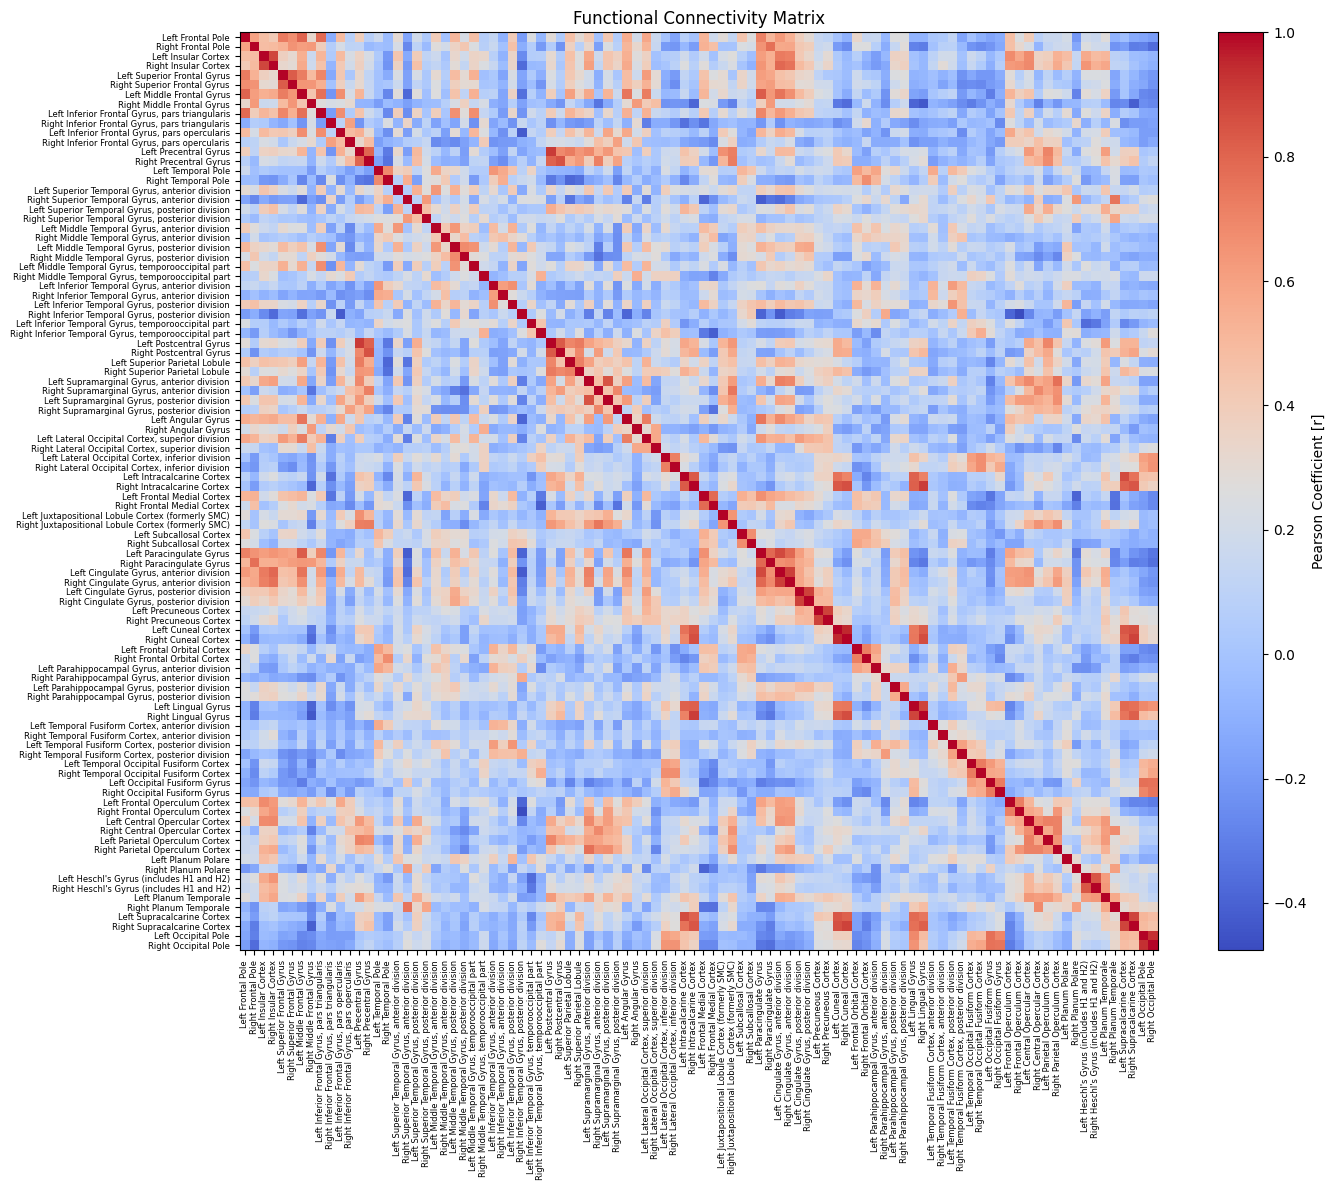

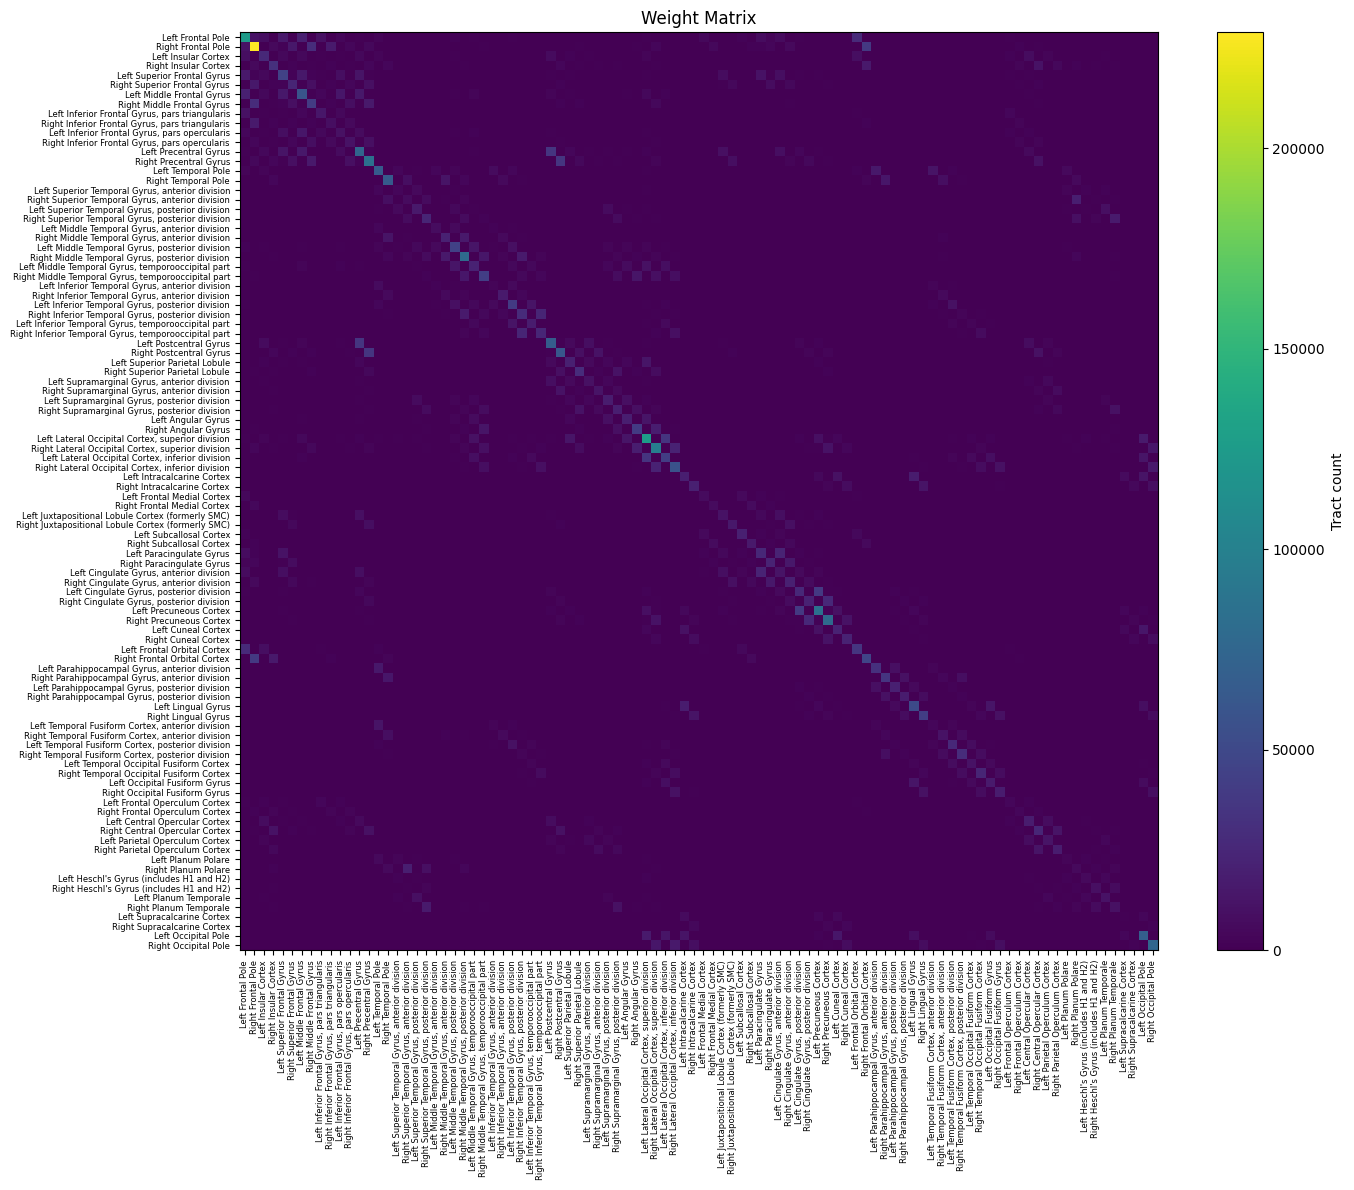

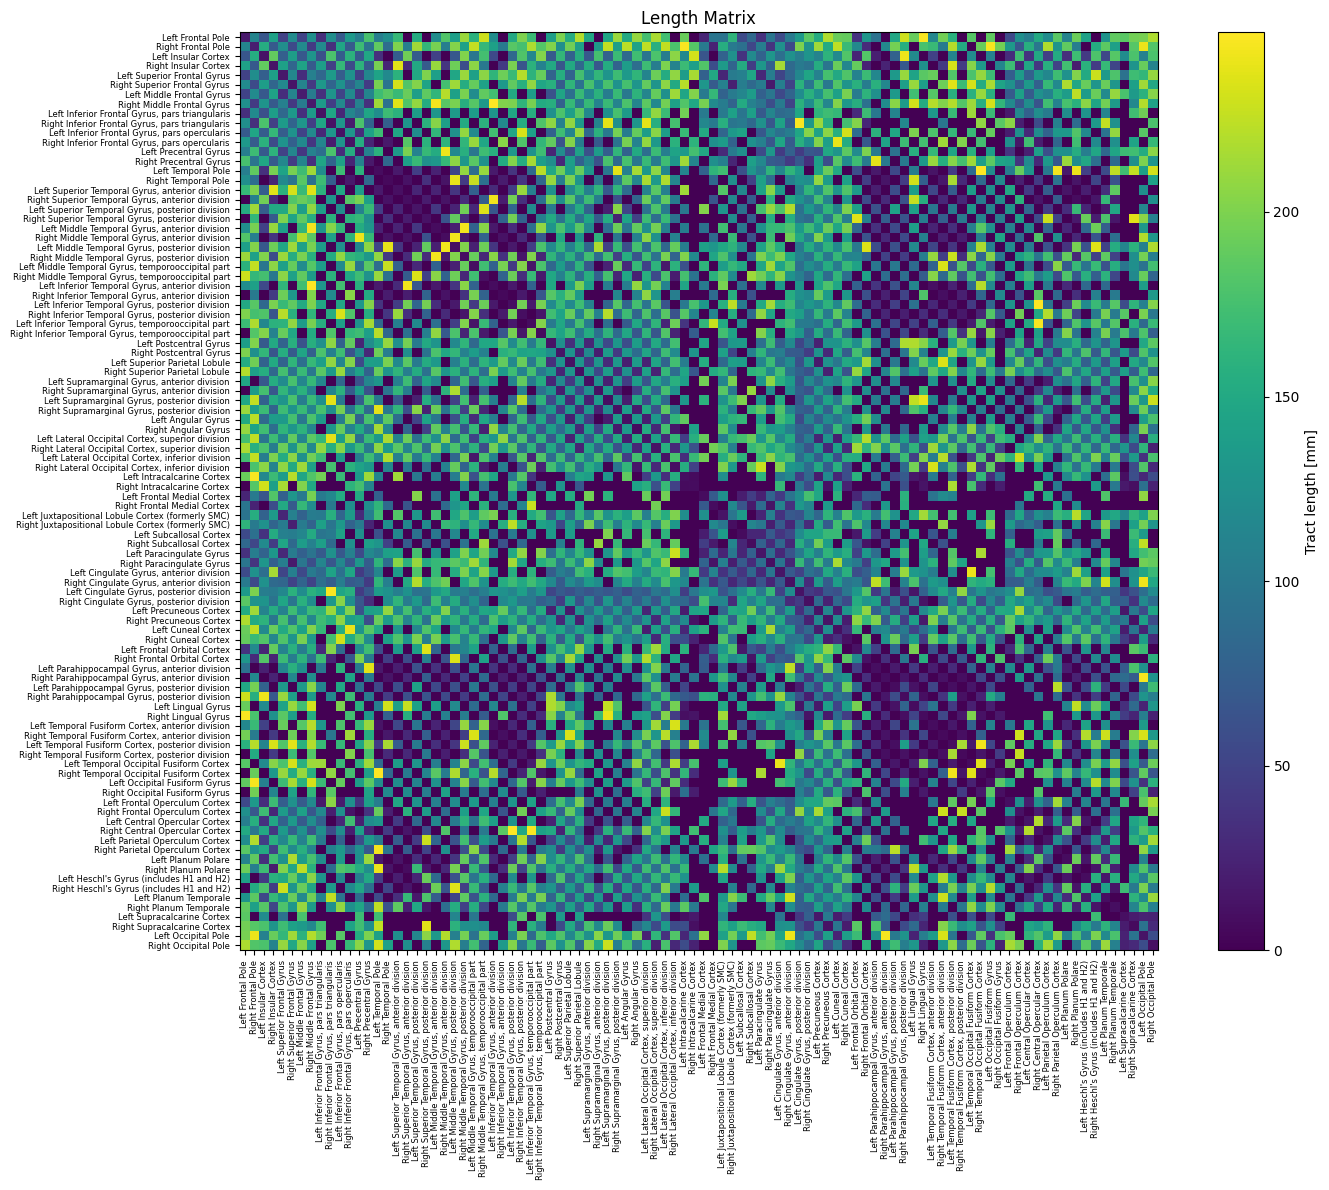

In [22]:
import matplotlib.pyplot as plt

def plot_connectivity_matrix(matrix, labels, matrix_type='Functional Connectivity'):
    """
    Plots a brain connectivity matrix with appropriate settings for functional connectivity, weights, or lengths.

    Parameters:
    - matrix: The matrix to be plotted (e.g., functional connectivity, weight, or length matrix).
    - labels: List of region labels to use for the x and y ticks.
    - matrix_type: Type of the matrix being plotted. Options are:
      'Functional Connectivity', 'Weight', 'Length'. Default is 'Functional Connectivity'.
    """
    # Set colormap and colorbar label based on the matrix type
    if matrix_type == 'Functional Connectivity':
        cmap = 'coolwarm'
        colorbar_label = 'Pearson Coefficient [r]'
    elif matrix_type == 'Weight':
        cmap = 'viridis'
        colorbar_label = 'Tract count'
    elif matrix_type == 'Length':
        cmap = 'viridis'
        colorbar_label = 'Tract length [mm]'
    else:
        raise ValueError("Invalid matrix_type. Choose from 'Functional Connectivity', 'Weight', 'Length'.")

    # Create the plot
    fig, ax = plt.subplots(figsize=(16, 12))
    im = ax.imshow(matrix, cmap=cmap)
    ax.set_title(f'{matrix_type} Matrix')
    ax.set_xticks(range(len(labels)))
    ax.set_yticks(range(len(labels)))
    ax.set_xticklabels(labels, rotation=90, fontsize=6)
    ax.set_yticklabels(labels, fontsize=6)
    
    # Add the colorbar
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.set_label(colorbar_label)

    # Adjust layout to fit labels
    plt.tight_layout()

    # Show the plot
    plt.show()

# Example usage
plot_connectivity_matrix(fc_matrix.values, labels_list, matrix_type='Functional Connectivity')
plot_connectivity_matrix(weight_matrix.values, labels_list, matrix_type='Weight')
plot_connectivity_matrix(length_matrix.values, labels_list, matrix_type='Length')

Correlation between structural and functional connectivity: 0.341


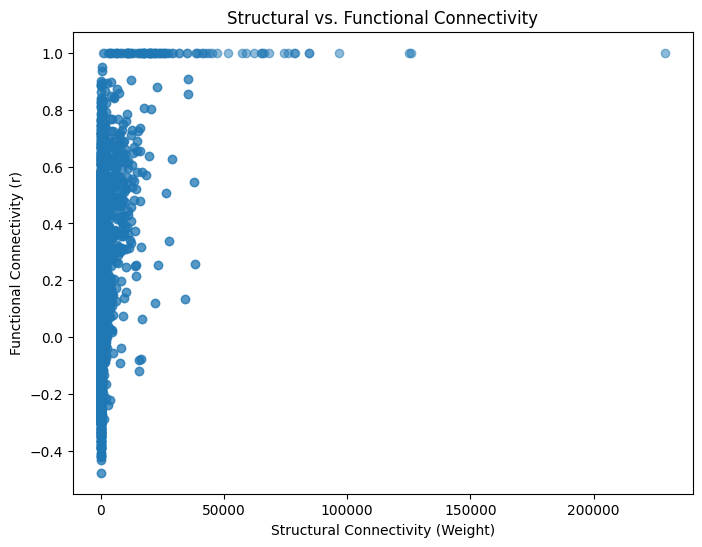

In [23]:
import numpy as np

# Flatten the matrices to compare corresponding values
flattened_fc = fc_matrix.values.flatten()
flattened_weight = weight_matrix.values.flatten()

# Calculate the correlation between structural and functional connectivity
correlation = np.corrcoef(flattened_fc, flattened_weight)[0, 1]
print(f"Correlation between structural and functional connectivity: {correlation:.3f}")

# Visualization of correlation
plt.figure(figsize=(8, 6))
plt.scatter(flattened_weight, flattened_fc, alpha=0.5)
plt.xlabel('Structural Connectivity (Weight)')
plt.ylabel('Functional Connectivity (r)')
plt.title('Structural vs. Functional Connectivity')
plt.show()

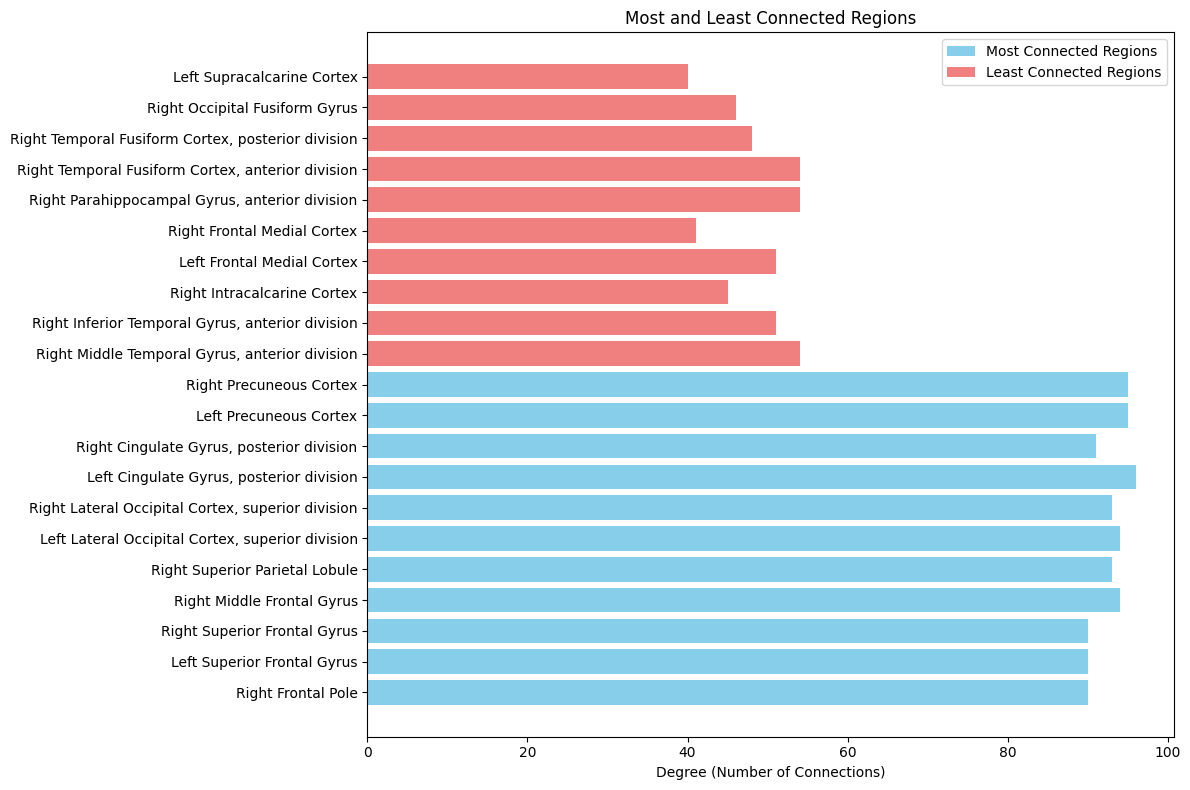

In [24]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate degree (number of connections) for each node
degrees = np.sum(weight_matrix.values > 0, axis=1)

# Identify most connected regions (e.g., top 10% by degree)
threshold_high = np.percentile(degrees, 90)
most_connected_indices = np.where(degrees >= threshold_high)[0]
most_connected_regions = [labels_list[i] for i in most_connected_indices]

# Identify least connected regions (e.g., bottom 10% by degree)
threshold_low = np.percentile(degrees, 10)
least_connected_indices = np.where(degrees <= threshold_low)[0]
least_connected_regions = [labels_list[i] for i in least_connected_indices]

# Create subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Plot most connected regions
ax.barh(most_connected_regions, degrees[most_connected_indices], color='skyblue', label='Most Connected Regions')

# Plot least connected regions
ax.barh(least_connected_regions, degrees[least_connected_indices], color='lightcoral', label='Least Connected Regions')

# Set labels and title
ax.set_xlabel('Degree (Number of Connections)')
ax.set_title('Most and Least Connected Regions')
ax.legend()

# Adjust layout to fit labels
plt.tight_layout()

# Show the plot
plt.show()

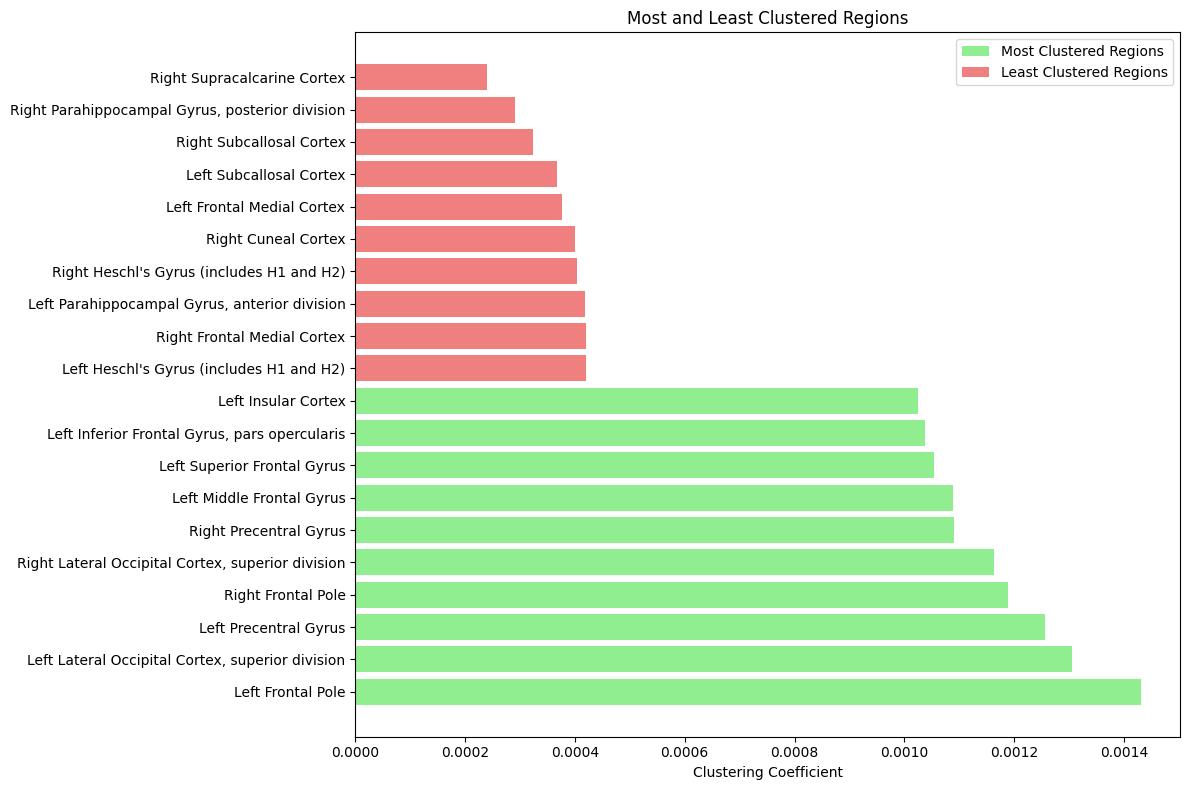

In [25]:
# Convert the weight matrix into a graph for analysis
G = nx.from_numpy_array(weight_matrix.values)

# Calculate clustering coefficient for each node
clustering_coefficients = nx.clustering(G, weight='weight')

# Sort nodes by clustering coefficient
sorted_clustering = sorted(clustering_coefficients.items(), key=lambda item: item[1], reverse=True)

# Extract the indices and coefficients of the most clustered regions (top 10)
most_clusters = sorted_clustering[:10]  # 10 most clustered regions
most_regions, most_coefficients = zip(*most_clusters)
most_labels = [labels_list[i] for i in most_regions]

# Extract the indices and coefficients of the least clustered regions (bottom 10)
least_clusters = sorted_clustering[-10:]  # 10 least clustered regions
least_regions, least_coefficients = zip(*least_clusters)
least_labels = [labels_list[i] for i in least_regions]

# Create subplots
fig, ax = plt.subplots(figsize=(12, 8))

# Plot most clustered regions
ax.barh(most_labels, most_coefficients, color='lightgreen', label='Most Clustered Regions')

# Plot least clustered regions
ax.barh(least_labels, least_coefficients, color='lightcoral', label='Least Clustered Regions')

# Set labels and title
ax.set_xlabel('Clustering Coefficient')
ax.set_title('Most and Least Clustered Regions')
ax.legend()

# Adjust layout to fit labels
plt.tight_layout()

# Show the plot
plt.show()